###                                                  Project : Credit card fraud detection

### 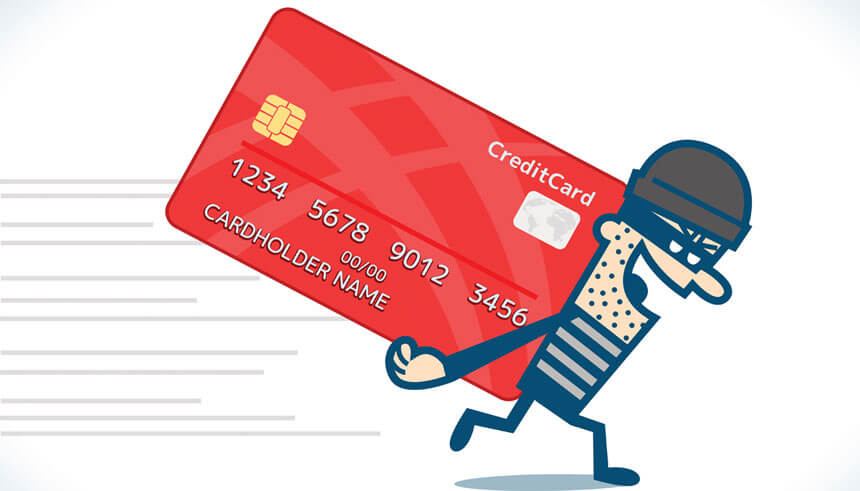

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### 1) Class 0 Means Not a fraudulent transaction
#### 2) Class 1 Means a fraudulent transaction

In [2]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [3]:
import seaborn as sb
sb.countplot(x='Class',data=df)

In [28]:
from sklearn.model_selection import train_test_split
y=df['Class']
x=df.drop('Class',axis=1)
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=4)
x_train, x_validate, y_train, y_validate=train_test_split(x_train,y_train,test_size=0.33,random_state=2)
train=pd.concat([x_train,y_train],axis=1)
validate=pd.concat([x_validate,y_validate],axis=1)
test=pd.concat([x_test,y_test],axis=1)

In [5]:
print('% of fraud transactions in train ',round(train['Class'].mean(),4))
print('% of fraud transactions in test ',round(test['Class'].mean(),4))

% of fraud transactions in train  0.0018
% of fraud transactions in test  0.0017


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,142857.0,94971.339570,47549.811771,0.0,54250.00,84967.0,139515.00,172792.0
1,258.0,83753.802326,48589.596933,406.0,41622.25,76856.0,133470.25,170348.0


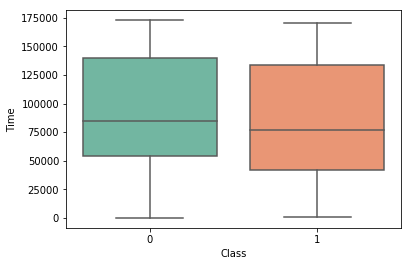

In [6]:
sb.boxplot(x='Class',y='Time',data=train,palette='Set2')
train.groupby('Class').Time.describe()

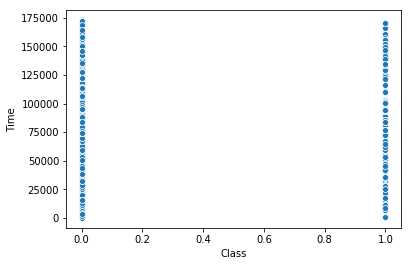

In [7]:
sb.scatterplot(x='Class',y='Time',data=train)

In [34]:
df = pd.concat([train,validate,test],axis=0)
df = df[list(train.columns.values)]
df.sort_index(inplace=True)
df['Time_Difference'] = df['Time']-df['Time'].shift()
df.dropna(axis=0,inplace=True)
y = df['Class'] #response vector
X = df.drop('Class',axis=1) #feature matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y,random_state=8125)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.333, stratify=y_train,random_state=812)
train = pd.concat([X_train, y_train],axis=1)
train.groupby('Class')['Time_Difference'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,142227.0,0.604646,1.059304,0.0,0.0,0.0,1.0,32.0
1,246.0,1.093496,1.762245,0.0,0.0,0.5,1.0,12.0


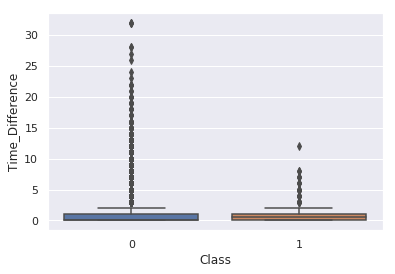

In [35]:
sb.boxplot(x='Class',y='Time_Difference',data=train)

### Most of the time differences are similiar, however, a large difference might indicate a fraud, as fraud often happens when there are few transactions.

/home/mayuresh/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


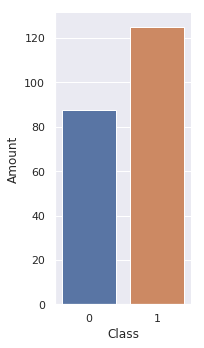

In [36]:
sb.factorplot(x="Class", y="Amount", data=train, kind="bar", ci=None, aspect=.6)

In [37]:
train.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,142227.0,87.706948,236.596594,0.0,5.55,22.00,77.00,12910.93
1,246.0,125.137154,236.372477,0.0,1.00,19.02,119.98,2125.87


In [38]:
train.groupby('Class')['Amount'].agg({'SUM':np.sum,'MEAN':np.mean})

/home/mayuresh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,SUM,MEAN
Class,,
0,1.247430e+07,87.706948
1,3.078374e+04,125.137154


### We can keep an amount of 5000 as threshold. So if the transaction involves amount greater than 5000 it may be a fradulent one.

In [39]:
import numpy as np
pd.options.mode.chained_assignment = None
def amount_threshold(x):
    if x > 5000: 
        return 1
    else: 
        return 0
X_train['Large_Amount'] = X_train['Amount'].apply(lambda z:amount_threshold(z))
X_validate['Large_Amount'] = X_validate['Amount'].apply(lambda z:amount_threshold(z))
X_test['Large_Amount'] = X_test['Amount'].apply(lambda z:amount_threshold(z))

### We will first use logistic regression, with parameter tuned by stratified cross validation, to predict the probability of labels. We use area under Precision-Recall curve, aka average precision score to evaluate the performance. The reason to choose PR AUC over ROC AUC is that PR does not account for true negatives,therefore more suitable for imbalanced classification.

### In a classification problem, we may decide to predict the class values directly.


### Alternately, it can be more flexible to predict the probabilities for each class instead. The reason for this is to provide the capability to choose and even calibrate the threshold for how to interpret the predicted probabilities.


### For example, a default might be to use a threshold of 0.5, meaning that a probability in 0-0.49 is a negative outcome (0) and a probability in 0.5-1.0 is a positive outcome (1).


### This threshold can be adjusted to tune the behavior of the model for a specific problem.

In [40]:
from sklearn.linear_model import LogisticRegressionCV
logCV = LogisticRegressionCV(Cs=[0.01,0.1,1,10,100], scoring='average_precision',verbose=0,
max_iter=1000,random_state=5001)
logCV.fit(X_train,y_train)
print("The best parameter C is",logCV.C_[0])

/home/mayuresh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/mayuresh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


The best parameter C is 0.01


Average-Precision: 0.6992011845217078


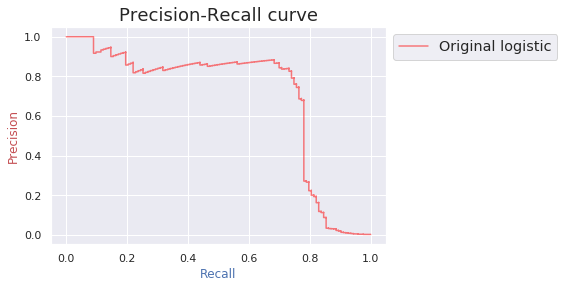

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score, precision_recall_curve
pred_prob = logCV.predict_proba(X_validate)
y_score = pred_prob[:,1]
average_precision = average_precision_score(y_validate, y_score)
original_precision, original_recall, original_thresholds = precision_recall_curve(y_validate, y_score)
plt.step(original_recall, original_precision, color='red', alpha=0.5,linewidth=1.5,label='Original logistic')
plt.xlabel('Recall',color='b')
plt.ylabel('Precision',color='r')
plt.title('Precision-Recall curve',fontsize=18)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large');
print('Average-Precision:',average_precision)

### It's time to do some resampling to our train set! We will oversample our minority class with SMOTE(Synthetic Minority Over-sampling Technique), which generates new samples similiar but not typically identical of minority classes, since the algorithm takes nearby instances of same class into account. One important thing to mention is that we should NEVER resample our validation or test set, since it might lead to an over-optimistic performance that is untrustable.

In [43]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=4001,kind='regular')
X_res, y_res = sm.fit_sample(X_train, y_train)
pd.value_counts(y_res)

1    142227
0    142227
dtype: int64

In [59]:
from sklearn.linear_model import LogisticRegression
log_res = LogisticRegression(C=0.01, verbose=0, random_state=5001)
log_res.fit(X_res,y_res)

/home/mayuresh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=5001, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Average-Precision: 0.7156369533918653


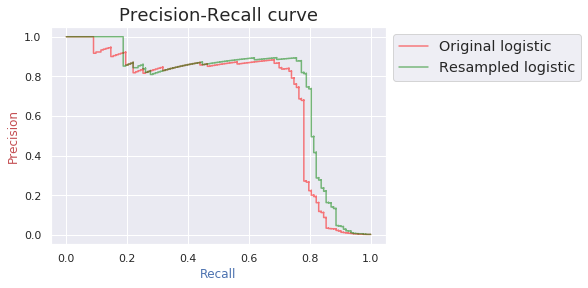

In [60]:
pred_prob = log_res.predict_proba(X_validate)
resampled_score = pred_prob[:,1]
average_precision = average_precision_score(y_validate, resampled_score)
resampled_precision, resampled_recall, resampled_thresholds = precision_recall_curve(y_validate, resampled_score)
plt.step(original_recall, original_precision, color='red', alpha=0.5,linewidth=1.5,label='Original logistic')
plt.step(resampled_recall, resampled_precision, color='green', alpha=0.5,linewidth=1.5,label='Resampled logistic')
plt.xlabel('Recall',color='b')
plt.ylabel('Precision',color='r')
plt.title('Precision-Recall curve',fontsize=18)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')
sb.set()
print('Average-Precision:',average_precision)

### We observe that the average-precision score or area under precision-recall curve increased after resampling

### We observe that the average-precision score or area under precision-recall curve increased after resampling

### We can see from the right of the plot that resampling does bring improvement to our model. Similiar precision rate now gives us a higher recall rate! Next we will approach with different models to see if we can make further improvement.


### Also we observe that the average-precision score or area under precision-recall curve increased after resampling

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=4, n_estimators=100, bootstrap=True, random_state=7017)
rf.fit(X_res,y_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=7017, verbose=0,
            warm_start=False)

Average-Precision: 0.6763455247604019


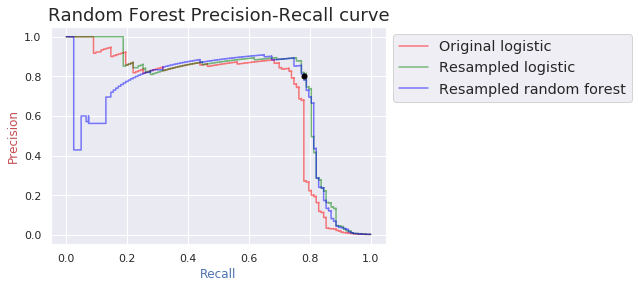

In [70]:
pred_prob = rf.predict_proba(X_validate)
rf_score = pred_prob[:,1] #Probability for class 1
average_precision = average_precision_score(y_validate, rf_score)
rf_precision, rf_recall, rf_thresholds = precision_recall_curve(y_validate, rf_score)
plt.step(original_recall, original_precision, color='red', alpha=0.5,linewidth=1.5,label='Original logistic')
plt.step(resampled_recall, resampled_precision, color='green', alpha=0.5,linewidth=1.5,label='Resampled logistic')
plt.step(rf_recall, rf_precision, color='blue', alpha=0.5,linewidth=1.5,label='Resampled random forest')
plt.xlabel('Recall',color='b')
plt.ylabel('Precision',color='r')
plt.title('Random Forest Precision-Recall curve',fontsize=18)
plt.plot([0.78],[0.80],color="black",marker='o', markersize=5)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')
print('Average-Precision:',average_precision)

In [71]:
sqerror = []
for recall, precision in zip(rf_recall, rf_precision):
    err = (recall-0.78)**2 + (precision-0.80)**2
    sqerror.append(err)
sqerror = np.asarray(sqerror)
min_index = np.where(sqerror==min(sqerror))
opt_threshold = rf_thresholds[min_index]
"The optimised threshold is: {0:0.2f}".format(opt_threshold[0])

'The optimised threshold is: 0.79'

Text(0.5, 1.0, 'Confusion matrix for prediction on test set')

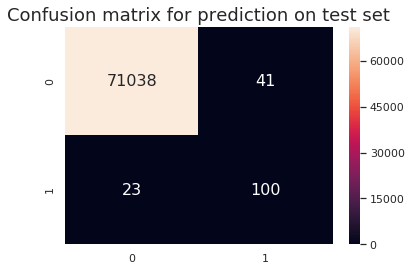

In [72]:
from sklearn import metrics
pred_prob = rf.predict_proba(X_test)
y_score = pred_prob[:,1] #Prediction for class 1
y_pred = [1 if x > opt_threshold else 0 for x in y_score] #y_score will contain list of probabilities for class 1. We will classify probabilities above threshold as class 1
conf = metrics.confusion_matrix(y_test,y_pred)
sb.heatmap(conf, annot=True, fmt='g', annot_kws={"size": 16})
plt.title('Confusion matrix for prediction on test set',fontsize=18)

### We can understand the basic principle of confusion matrix by looking at the diagram given below

##### 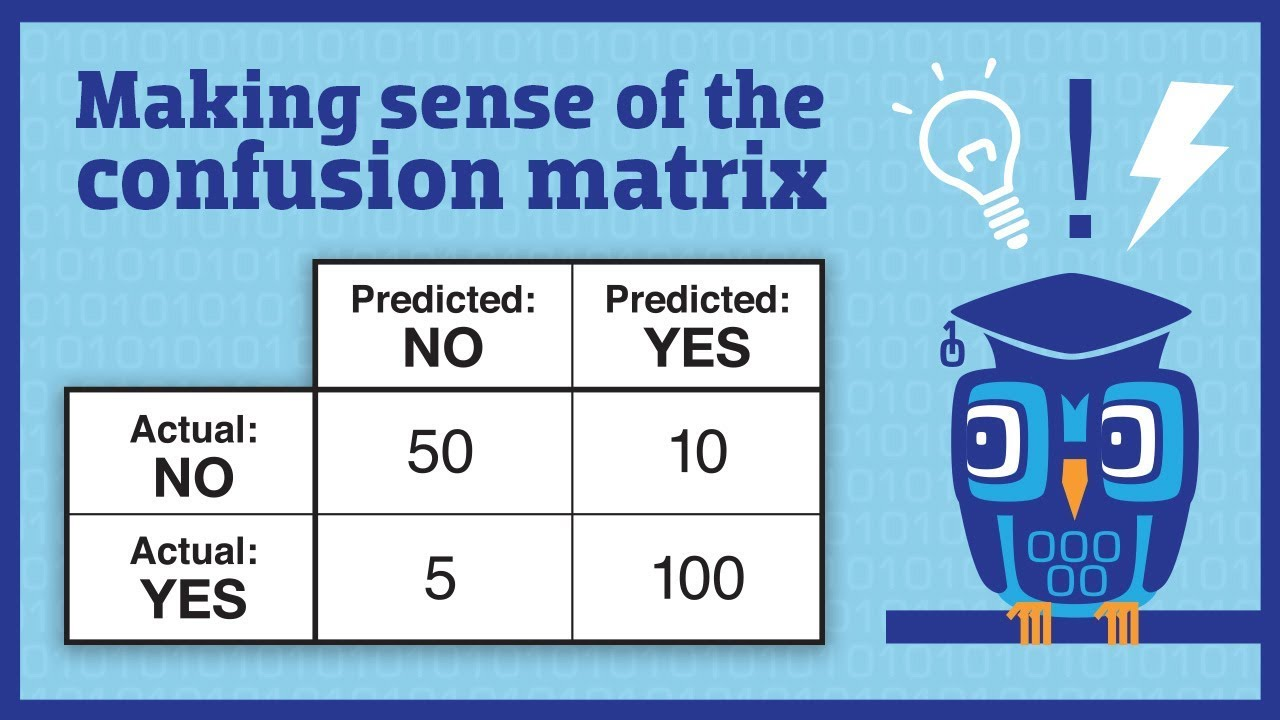

In [25]:
y_test.value_counts()

0    71079
1      123
Name: Class, dtype: int64

### Hence, from confusion matrix we can see that there are:
### TN:71039 FP:40 -> Total:71079
### FN:23 TP:100 -> Total:123

In [26]:
print('Accuracy Score :',metrics.accuracy_score(y_test,y_pred))
print('Report : ')
print(metrics.classification_report(y_test,y_pred))

Accuracy Score : 0.999115193393444
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.71      0.81      0.76       123

   micro avg       1.00      1.00      1.00     71202
   macro avg       0.86      0.91      0.88     71202
weighted avg       1.00      1.00      1.00     71202



### High recall, low precision:This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.

### Low recall, high precision:This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)

### Conclusion

###### 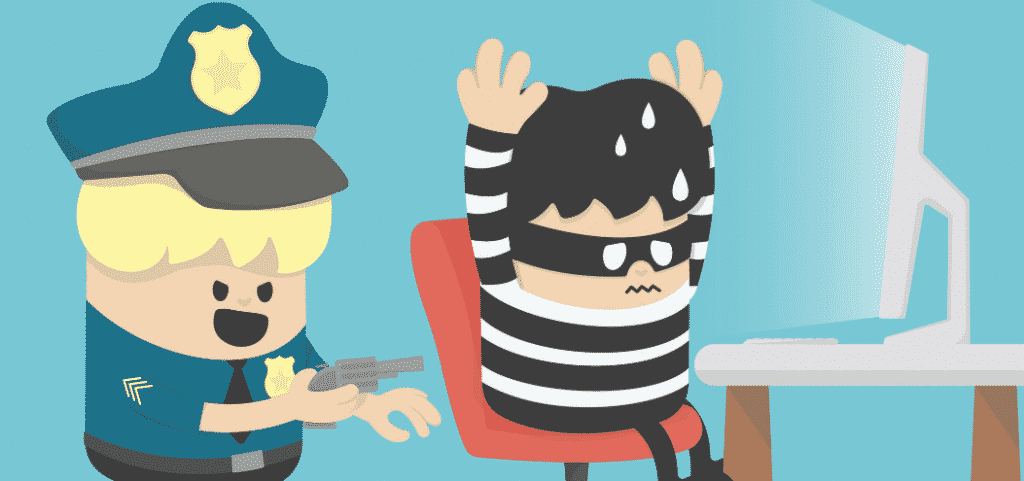

### For this project I have investigated whether resampling technique can bring improvement to model of imbalanced classification. From what I see, I believe that the answer is yes, however there are certain things I would like to mention in addition.

1. Tuning parameters of resampled model with cross validation can possibly improve our model, however, we should not do cv after oversampling or else the oversampled validation slice of each fold won't be a good estimate of test set. The proper steps to do cv for each fold is to first select a validation set and leave it unchanged, oversample the remain data, and finally test the trained model on unchanged validation set.



2. There are other oversample techniques such as ROSE that we didn't try but can possibly improve our model. Undersampling techniques might be a suitable choice too.